In [9]:
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fifa = pd.read_excel(r'Desktop/fifa18_clean.xls')
fifa.head()

,Wage (€),Value (€),Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,565000,95500000,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,565000,105000000,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,280000,123000000,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,510000,97000000,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,230000,61000000,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
fifanew = fifa[["Acceleration", "Preferred Positions"]].head()
fifanew

,Acceleration,Preferred Positions
0,89.0,ST LW
1,92.0,RW
2,94.0,LW
3,88.0,ST
4,58.0,GK


In [34]:
fifa_nw = fifanew.pivot("Acceleration", "Preferred Positions")
print(fifa_nw)

Empty DataFrame
Columns: []
Index: [58.0, 88.0, 89.0, 92.0, 94.0]


In [3]:
fifa['Nationality'].value_counts()[0:5]

England      1630
Germany      1140
Spain        1019
France        978
Argentina     965
Name: Nationality, dtype: int64

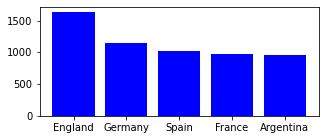

In [6]:
plt.figure(figsize=(5,2))
plt.bar(list(fifa['Nationality'].value_counts()[0:5].keys()), list(fifa['Nationality'].value_counts()[0:5]), color='b')
plt.show()

In [69]:
player_salary = fifa[["Club", "Name", "Wage (€)"]]
player_salary.rename(columns={"Wage (€)":"Wage_(€)"}, inplace=True)
player_salary.head(10)

C:\Users\Maithily\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Club,Name,Wage_(€)
0,Real Madrid CF,Cristiano Ronaldo,565000
1,FC Barcelona,L. Messi,565000
2,Paris Saint-Germain,Neymar,280000
3,FC Barcelona,L. Suárez,510000
4,FC Bayern Munich,M. Neuer,230000
5,FC Bayern Munich,R. Lewandowski,355000
6,Manchester United,De Gea,215000
7,Chelsea,E. Hazard,295000
8,Real Madrid CF,T. Kroos,340000
9,Juventus,G. Higuaín,275000


In [70]:
player_salary.sort_values(by=["Wage_(€)"], ascending=False, inplace=True)
player_salary[0:10]

<ipython-input-70-9756b05e0142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_salary.sort_values(by=["Wage_(€)"], ascending=False, inplace=True)


,Club,Name,Wage_(€)
0,Real Madrid CF,Cristiano Ronaldo,565000
1,FC Barcelona,L. Messi,565000
3,FC Barcelona,L. Suárez,510000
15,Real Madrid CF,G. Bale,370000
5,FC Bayern Munich,R. Lewandowski,355000
14,Real Madrid CF,L. Modrić,340000
8,Real Madrid CF,T. Kroos,340000
16,Manchester City,S. Agüero,325000
10,Real Madrid CF,Sergio Ramos,310000
7,Chelsea,E. Hazard,295000


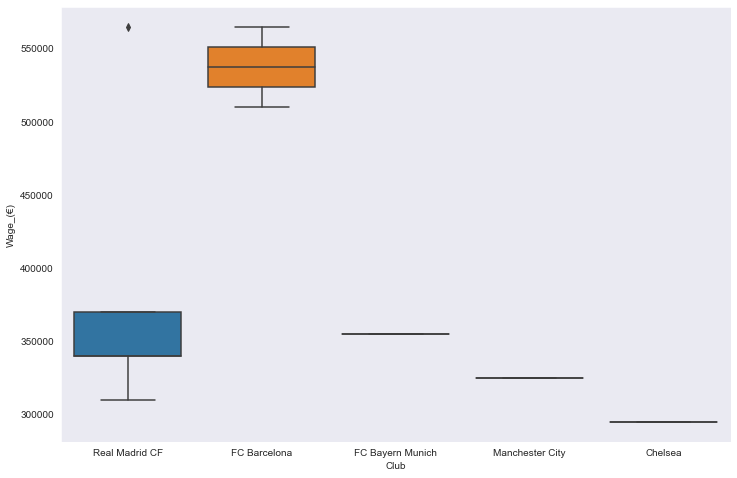

In [71]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Club", y="Wage_(€)", data=player_salary[0:10])
sns.set_style("dark")
plt.show()

In [67]:
name_salary = fifa[["Name", "Wage (€)"]]
name_salary.rename(columns={"Wage (€)":"Wage_(€)"}, inplace=True)
name_salary.head(10)

C:\Users\Maithily\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Name,Wage_(€)
0,Cristiano Ronaldo,565000
1,L. Messi,565000
2,Neymar,280000
3,L. Suárez,510000
4,M. Neuer,230000
5,R. Lewandowski,355000
6,De Gea,215000
7,E. Hazard,295000
8,T. Kroos,340000
9,G. Higuaín,275000


In [66]:
#name_salary.set_index(["Wage_(€)"], inplace=True)
#name_salary[0:10]

In [68]:
name_salary.sort_values(by=['Wage_(€)'], ascending=False, inplace=True)
name_salary[0:10]

<ipython-input-68-1f2545e88f81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_salary.sort_values(by=['Wage_(€)'], ascending=False, inplace=True)


,Name,Wage_(€)
0,Cristiano Ronaldo,565000
1,L. Messi,565000
3,L. Suárez,510000
15,G. Bale,370000
5,R. Lewandowski,355000
14,L. Modrić,340000
8,T. Kroos,340000
16,S. Agüero,325000
10,Sergio Ramos,310000
7,E. Hazard,295000


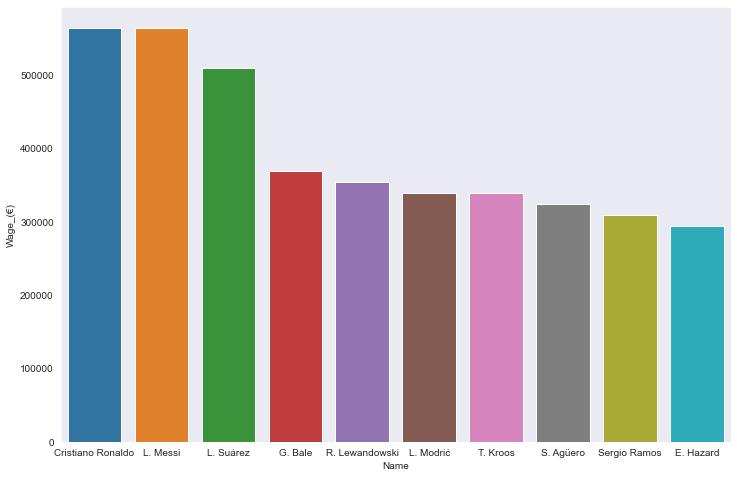

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(x="Name", y="Wage_(€)", data=name_salary[0:10])
sns.set_style("dark")
plt.show()

In [3]:
fifa_GK = fifa[fifa['Preferred Positions'].str.startswith('GK')]
fifa18 = fifa_GK[['Wage (€)','Name','Age','Nationality','Club','GK diving','GK handling','GK kicking','GK positioning','GK reflexes']]
fifa18.head(10)

,Wage (€),Name,Age,Nationality,Club,GK diving,GK handling,GK kicking,GK positioning,GK reflexes
4,230000,M. Neuer,31,Germany,FC Bayern Munich,91.0,90.0,95.0,91.0,89.0
6,215000,De Gea,26,Spain,Manchester United,90.0,85.0,87.0,86.0,90.0
12,190000,T. Courtois,25,Belgium,Chelsea,85.0,91.0,69.0,86.0,88.0
18,110000,G. Buffon,39,Italy,Juventus,89.0,88.0,74.0,90.0,84.0
20,82000,J. Oblak,24,Slovenia,Atlético Madrid,84.0,90.0,77.0,87.0,84.0
29,165000,H. Lloris,30,France,Tottenham Hotspur,88.0,86.0,68.0,82.0,90.0
43,91000,S. Handanovič,32,Slovenia,Inter,87.0,86.0,69.0,87.0,87.0
68,92000,P. Čech,35,Czech Republic,Arsenal,82.0,87.0,76.0,83.0,81.0
74,165000,K. Navas,30,Costa Rica,Real Madrid CF,87.0,82.0,72.0,80.0,85.0
76,46000,D. Subašić,32,Croatia,AS Monaco,84.0,79.0,79.0,85.0,87.0


In [4]:
fifa18 = fifa18.assign(GK_Score_Attributes=fifa_GK.loc[:,['GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes']].mean(axis=1))
fifa18.head(10)

,Wage (€),Name,Age,Nationality,Club,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,GK_Score_Attributes
4,230000,M. Neuer,31,Germany,FC Bayern Munich,91.0,90.0,95.0,91.0,89.0,91.2
6,215000,De Gea,26,Spain,Manchester United,90.0,85.0,87.0,86.0,90.0,87.6
12,190000,T. Courtois,25,Belgium,Chelsea,85.0,91.0,69.0,86.0,88.0,83.8
18,110000,G. Buffon,39,Italy,Juventus,89.0,88.0,74.0,90.0,84.0,85.0
20,82000,J. Oblak,24,Slovenia,Atlético Madrid,84.0,90.0,77.0,87.0,84.0,84.4
29,165000,H. Lloris,30,France,Tottenham Hotspur,88.0,86.0,68.0,82.0,90.0,82.8
43,91000,S. Handanovič,32,Slovenia,Inter,87.0,86.0,69.0,87.0,87.0,83.2
68,92000,P. Čech,35,Czech Republic,Arsenal,82.0,87.0,76.0,83.0,81.0,81.8
74,165000,K. Navas,30,Costa Rica,Real Madrid CF,87.0,82.0,72.0,80.0,85.0,81.2
76,46000,D. Subašić,32,Croatia,AS Monaco,84.0,79.0,79.0,85.0,87.0,82.8


In [10]:
fifa18.sort_values(by=['GK_Score_Attributes'], ascending=False, inplace=True)
fifa18[0:10]

,Wage (€),Name,Age,Nationality,Club,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,GK_Score_Attributes
4,230000,M. Neuer,31,Germany,FC Bayern Munich,91.0,90.0,95.0,91.0,89.0,91.2
6,215000,De Gea,26,Spain,Manchester United,90.0,85.0,87.0,86.0,90.0,87.6
18,110000,G. Buffon,39,Italy,Juventus,89.0,88.0,74.0,90.0,84.0,85.0
20,82000,J. Oblak,24,Slovenia,Atlético Madrid,84.0,90.0,77.0,87.0,84.0,84.4
78,155000,M. ter Stegen,25,Germany,FC Barcelona,84.0,83.0,87.0,81.0,86.0,84.2
12,190000,T. Courtois,25,Belgium,Chelsea,85.0,91.0,69.0,86.0,88.0,83.8
43,91000,S. Handanovič,32,Slovenia,Inter,87.0,86.0,69.0,87.0,87.0,83.2
103,39000,T. Horn,24,Germany,1. FC Köln,83.0,81.0,83.0,82.0,86.0,83.0
88,49000,S. Ruffier,30,France,AS Saint-Étienne,82.0,84.0,77.0,85.0,87.0,83.0
29,165000,H. Lloris,30,France,Tottenham Hotspur,88.0,86.0,68.0,82.0,90.0,82.8


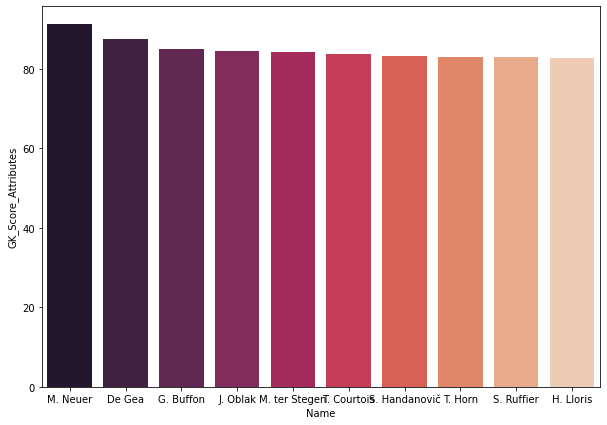

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(x="Name", y="GK_Score_Attributes", data=fifa18[0:10], palette="rocket")
plt.show()

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fifa = pd.read_excel(r'Desktop/fifa18_clean.xls')
fifa.head(10)

,Wage (€),Value (€),Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,565000,95500000,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,565000,105000000,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,280000,123000000,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,510000,97000000,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,230000,61000000,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,355000,92000000,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,215000,64500000,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,295000,90500000,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,340000,79000000,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,275000,77000000,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [4]:
fifa_fwd = fifa[['Wage (€)','Name','Age','Nationality','Club','CF', 'ST', 'Preferred Positions']]
fifa_fwd.rename(columns = {'Preferred Positions':'Preferred_Positions'}, inplace=True)
fifa_fwd.head(10)

C:\Users\Maithily\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions
0,565000,Cristiano Ronaldo,32,Portugal,Real Madrid CF,91.0,92.0,ST LW
1,565000,L. Messi,30,Argentina,FC Barcelona,92.0,88.0,RW
2,280000,Neymar,25,Brazil,Paris Saint-Germain,88.0,84.0,LW
3,510000,L. Suárez,30,Uruguay,FC Barcelona,88.0,88.0,ST
4,230000,M. Neuer,31,Germany,FC Bayern Munich,NaN,NaN,GK
5,355000,R. Lewandowski,28,Poland,FC Bayern Munich,87.0,88.0,ST
6,215000,De Gea,26,Spain,Manchester United,NaN,NaN,GK
7,295000,E. Hazard,26,Belgium,Chelsea,87.0,82.0,LW
8,340000,T. Kroos,27,Germany,Real Madrid CF,81.0,77.0,CDM CM
9,275000,G. Higuaín,29,Argentina,Juventus,84.0,87.0,ST


In [31]:
FWD = ['CF', 'ST']
fifa18_FWD = fifa_fwd[fifa_fwd['Preferred_Positions'].isin(FWD)]
fifa18_FWD['Preferred_Positions'].value_counts()

ST    1847
CF      17
Name: Preferred_Positions, dtype: int64

In [64]:
def Score_Attributes(Preferred_Positions):
    if Preferred_Positions == "ST":
        return fifa18_FWD.loc[:,['ST']].mean()
    else:
        return fifa18_FWD.loc[:,['CF']].mean()

In [66]:
def Score_Attributes(Preferred_Positions):
    if Preferred_Positions == "ST":
        return fifa18_FWD['ST'].mean()
    else:
        return fifa18_FWD['CF'].mean()

In [67]:
fifa18_FWD['FWD_Score'] = fifa18_FWD['Preferred_Positions'].apply(Score_Attributes)

<ipython-input-67-0722dab2ab6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa18_FWD['FWD_Score'] = fifa18_FWD['Preferred_Positions'].apply(Score_Attributes)


In [76]:
fifa18_FWD.head(10)

,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions,FWD_Score
3,510000,L. Suárez,30,Uruguay,FC Barcelona,88.0,88.0,ST,64.630365
5,355000,R. Lewandowski,28,Poland,FC Bayern Munich,87.0,88.0,ST,64.630365
9,275000,G. Higuaín,29,Argentina,Juventus,84.0,87.0,ST,64.630365
16,325000,S. Agüero,29,Argentina,Manchester City,87.0,86.0,ST,64.630365
23,165000,P. Aubameyang,28,Gabon,Borussia Dortmund,84.0,85.0,ST,64.630365
31,240000,Z. Ibrahimović,35,Sweden,Manchester United,83.0,84.0,ST,64.630365
38,160000,E. Cavani,30,Uruguay,Paris Saint-Germain,82.0,84.0,ST,64.630365
46,165000,H. Kane,23,England,Tottenham Hotspur,82.0,84.0,ST,64.630365
50,210000,R. Lukaku,24,Belgium,Manchester United,80.0,84.0,ST,64.630365
58,235000,Diego Costa,28,Spain,Chelsea,80.0,83.0,ST,64.630365


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fifa = pd.read_excel(r'Desktop/fifa18_clean.xls')
fifa.head()

,Wage (€),Value (€),Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,565000,95500000,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,565000,105000000,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,280000,123000000,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,510000,97000000,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,230000,61000000,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
fifa_fwd = fifa[['Wage (€)','Name','Age','Nationality','Club','CF', 'ST', 'Preferred Positions']]
fifa_fwd.rename(columns = {'Preferred Positions':'Preferred_Positions'}, inplace=True)
fifa_fwd.head()

C:\Users\Maithily\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions
0,565000,Cristiano Ronaldo,32,Portugal,Real Madrid CF,91.0,92.0,ST LW
1,565000,L. Messi,30,Argentina,FC Barcelona,92.0,88.0,RW
2,280000,Neymar,25,Brazil,Paris Saint-Germain,88.0,84.0,LW
3,510000,L. Suárez,30,Uruguay,FC Barcelona,88.0,88.0,ST
4,230000,M. Neuer,31,Germany,FC Bayern Munich,NaN,NaN,GK


In [17]:
fifast1 = fifa_fwd[fifa_fwd['Preferred_Positions'].str.contains('ST')]

fifast1

,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions
0,565000,Cristiano Ronaldo,32,Portugal,Real Madrid CF,91.0,92.0,ST LW
3,510000,L. Suárez,30,Uruguay,FC Barcelona,88.0,88.0,ST
5,355000,R. Lewandowski,28,Poland,FC Bayern Munich,87.0,88.0,ST
9,275000,G. Higuaín,29,Argentina,Juventus,84.0,87.0,ST
13,265000,A. Sánchez,28,Chile,Arsenal,85.0,83.0,RM LW ST LM
...,...,...,...,...,...,...,...,...
17959,1000,N. McLaughlin,18,Scotland,Partick Thistle F.C.,47.0,46.0,CAM ST
17969,1000,F. Prohart,18,Austria,Wolfsberger AC,48.0,46.0,ST
17971,2000,R. White,18,England,Bolton Wanderers,49.0,52.0,ST RM LM
17978,1000,J. Young,17,Scotland,Swindon Town,45.0,45.0,ST


In [18]:
Top5ST = fifast1.sort_values(by=['ST'], ascending=False).head(5)
Top5ST

,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions
0,565000,Cristiano Ronaldo,32,Portugal,Real Madrid CF,91.0,92.0,ST LW
5,355000,R. Lewandowski,28,Poland,FC Bayern Munich,87.0,88.0,ST
3,510000,L. Suárez,30,Uruguay,FC Barcelona,88.0,88.0,ST
9,275000,G. Higuaín,29,Argentina,Juventus,84.0,87.0,ST
16,325000,S. Agüero,29,Argentina,Manchester City,87.0,86.0,ST


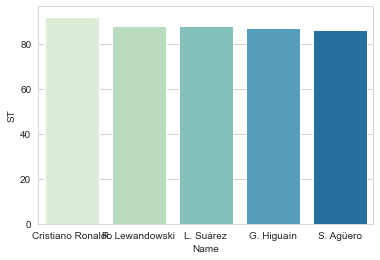

In [19]:
sns.set_style('whitegrid')
sns.barplot(x='Name', y='ST', data=Top5ST, palette="GnBu")
plt.show()

In [22]:
#sns.set_style('whitegrid')
#sns.kdeplot(x='Name', y='ST', data=Top5ST)

C:\Users\Maithily\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


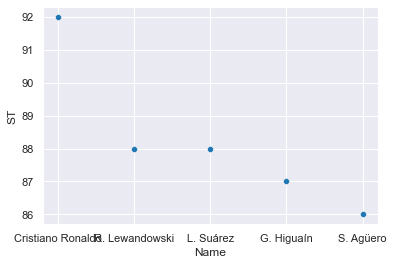

In [24]:
sns.scatterplot(Top5ST.Name, Top5ST.ST)
sns.set_style('darkgrid')
plt.show()

In [45]:
fifast = fifa_fwd[fifa_fwd['Preferred_Positions'].str.contains('ST')]

fifast['ST_Score'] = fifast.loc[:,'ST'].mean(axis=0)

Top5ST = fifast.sort_values(by=['ST'], ascending=False).head(5)
Top5ST

<ipython-input-45-f7910cdd5baa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifast['ST_Score'] = fifast.loc[:,'ST'].mean(axis=0)


,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions,ST_Score
0,565000,Cristiano Ronaldo,32,Portugal,Real Madrid CF,91.0,92.0,ST LW,65.012737
5,355000,R. Lewandowski,28,Poland,FC Bayern Munich,87.0,88.0,ST,65.012737
3,510000,L. Suárez,30,Uruguay,FC Barcelona,88.0,88.0,ST,65.012737
9,275000,G. Higuaín,29,Argentina,Juventus,84.0,87.0,ST,65.012737
16,325000,S. Agüero,29,Argentina,Manchester City,87.0,86.0,ST,65.012737


In [46]:
fifacf = fifa_fwd[fifa_fwd['Preferred_Positions'].str.contains('CF')]

fifacf['CF_Score'] = fifacf.loc[:,'CF'].mean(axis=0)

Top5CF = fifacf.sort_values(by=['CF'], ascending=False).head(5)
Top5CF

<ipython-input-46-0fc8c020080d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifacf['CF_Score'] = fifacf.loc[:,'CF'].mean(axis=0)


,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions,CF_Score
61,135000,D. Mertens,30,Belgium,Napoli,85.0,78.0,ST LW CF,67.157143
52,190000,T. Müller,27,Germany,FC Bayern Munich,83.0,83.0,ST CAM RW CF,67.157143
96,115000,D. Alli,21,England,Tottenham Hotspur,83.0,81.0,LM CF CAM,67.157143
125,60000,A. Gómez,29,Argentina,Atalanta,83.0,76.0,ST LW CF,67.157143
145,135000,Roberto Firmino,25,Brazil,Liverpool,83.0,81.0,CAM CF ST,67.157143


C:\Users\Maithily\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


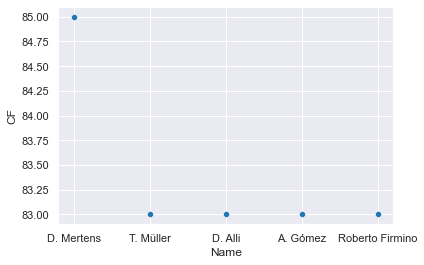

In [48]:
sns.scatterplot(Top5CF.Name, Top5CF.CF)
sns.set_style('darkgrid')
plt.show()

In [6]:
fifast1 = fifa_fwd[fifa_fwd['Preferred_Positions'].str.contains('ST')]

fifast1

,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions
0,565000,Cristiano Ronaldo,32,Portugal,Real Madrid CF,91.0,92.0,ST LW
3,510000,L. Suárez,30,Uruguay,FC Barcelona,88.0,88.0,ST
5,355000,R. Lewandowski,28,Poland,FC Bayern Munich,87.0,88.0,ST
9,275000,G. Higuaín,29,Argentina,Juventus,84.0,87.0,ST
13,265000,A. Sánchez,28,Chile,Arsenal,85.0,83.0,RM LW ST LM
...,...,...,...,...,...,...,...,...
17959,1000,N. McLaughlin,18,Scotland,Partick Thistle F.C.,47.0,46.0,CAM ST
17969,1000,F. Prohart,18,Austria,Wolfsberger AC,48.0,46.0,ST
17971,2000,R. White,18,England,Bolton Wanderers,49.0,52.0,ST RM LM
17978,1000,J. Young,17,Scotland,Swindon Town,45.0,45.0,ST


In [20]:
fifast1.loc[fifast1['Preferred_Positions'].str.contains('ST '), 'ST_Location'] = 'S'
fifast1.loc[fifast1['Preferred_Positions'].str.contains(' ST'), 'ST_Location'] = 'E'
fifast1.loc[fifast1['Preferred_Positions'].str.contains(' ST '), 'ST_Location'] = 'M'

C:\Users\Maithily\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [23]:
fifast1.head()

,Wage (€),Name,Age,Nationality,Club,CF,ST,Preferred_Positions,ST_Location
0,565000,Cristiano Ronaldo,32,Portugal,Real Madrid CF,91.0,92.0,ST LW,S
3,510000,L. Suárez,30,Uruguay,FC Barcelona,88.0,88.0,ST,ST
5,355000,R. Lewandowski,28,Poland,FC Bayern Munich,87.0,88.0,ST,ST
9,275000,G. Higuaín,29,Argentina,Juventus,84.0,87.0,ST,ST
13,265000,A. Sánchez,28,Chile,Arsenal,85.0,83.0,RM LW ST LM,M


In [24]:
fifast1['ST_Location'].value_counts()

ST    1847
E      771
S      430
M      171
Name: ST_Location, dtype: int64

In [32]:
#fifa.rename(columns= {'Ball Control':'Ball_Control'}, inplace=True)
fifa['Avg.Acceleration'] = fifa['Acceleration'].mean()
fifa['Avg.Aggression'] = fifa['Aggression'].mean()
fifa['Avg.Agility'] = fifa['Agility'].mean()
fifa['Avg.Balance'] = fifa['Balance'].mean()
fifa['Avg.Ball_Control'] = fifa['Ball control'].mean()
fifa['Avg.Composure'] = fifa['Composure'].mean()
fifa['Avg.Crossing'] = fifa['Crossing'].mean()
fifa['Avg.Curve'] = fifa['Curve'].mean()
fifa['Avg.Dribbling'] = fifa['Dribbling'].mean()
fifa['Avg.Finishing'] = fifa['Finishing'].mean()

In [33]:
Avg_columns = fifa[["Avg.Acceleration", "Avg.Aggression", "Avg.Agility", "Avg.Balance", "Avg.Ball_Control", "Avg.Composure", "Avg.Crossing", "Avg.Curve", "Avg.Dribbling", "Avg.Finishing"]]

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wage (€)             17981 non-null  int64  
 1   Value (€)            17981 non-null  int64  
 2   Name                 17981 non-null  object 
 3   Age                  17981 non-null  int64  
 4   Photo                17981 non-null  object 
 5   Nationality          17981 non-null  object 
 6   Flag                 17981 non-null  object 
 7   Overall              17981 non-null  int64  
 8   Potential            17981 non-null  int64  
 9   Club                 17733 non-null  object 
 10  Club Logo            17981 non-null  object 
 11  Special              17981 non-null  int64  
 12  Acceleration         17897 non-null  float64
 13  Aggression           17913 non-null  float64
 14  Agility              17910 non-null  float64
 15  Balance              17924 non-null 

In [23]:
fifa.head()

,Wage (€),Value (€),Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,565000,95500000,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,565000,105000000,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,280000,123000000,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,510000,97000000,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,230000,61000000,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fifa.rename(columns= {'Preferred Positions':'Preferred_Positions'}, inplace=True)
attribute_columns = fifa[["Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing"]]
attribute_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Acceleration  17897 non-null  float64
 1   Aggression    17913 non-null  float64
 2   Agility       17910 non-null  float64
 3   Balance       17924 non-null  float64
 4   Ball control  17840 non-null  float64
 5   Composure     17887 non-null  float64
 6   Crossing      17885 non-null  float64
 7   Curve         17908 non-null  float64
 8   Dribbling     17850 non-null  float64
 9   Finishing     17867 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [27]:
Avg.Acceleration = fifa['Acceleration'].mean()
Avg.Acceleration

64.57652120467118

In [28]:
Avg.Acceleration = fifa['Acceleration'].mean()
Avg.Aggression = fifa['Aggression'].mean()
Avg.Agility = fifa['Agility'].mean()
Avg.Balance = fifa['Balance'].mean()
Avg.Ball_Control = fifa['Ball control'].mean()
Avg.Composure = fifa['Composure'].mean()
Avg.Crossing = fifa['Crossing'].mean()
Avg.Curve = fifa['Curve'].mean()
Avg.Dribbling = fifa['Dribbling'].mean()
Avg.Finishing = fifa['Finishing'].mean()

In [32]:
data = {'Attribute':["Acceleration", "Aggression", "Agility", "Balance", "Ball_Control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing"],
        'Average_values':[Avg.Acceleration, Avg.Aggression, Avg.Agility, Avg.Balance, Avg.Ball_Control, Avg.Composure, Avg.Crossing, Avg.Curve, Avg.Dribbling, Avg.Finishing]}
fifa_attribute = pd.DataFrame(data)
fifa_attribute

,Attribute,Average_values
0,Acceleration,64.576521
1,Aggression,55.791492
2,Agility,63.333613
3,Balance,63.803894
4,Ball_Control,58.071469
5,Composure,57.877341
6,Crossing,49.725301
7,Curve,47.261112
8,Dribbling,55.007227
9,Finishing,45.202720


In [34]:
positions = fifa['Preferred_Positions']
positions

0        ST LW
1           RW
2           LW
3           ST
4           GK
         ...  
17976       GK
17977       GK
17978       ST
17979       CM
17980    ST CB
Name: Preferred_Positions, Length: 17981, dtype: object

In [6]:
Avg_columns = fifa[["Avg.Acceleration", "Avg.Aggression", "Avg.Agility", "Avg.Balance", "Avg.Ball_Control", "Avg.Composure", "Avg.Crossing", "Avg.Curve", "Avg.Dribbling", "Avg.Finishing"]]
Avg_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg.Acceleration  17981 non-null  float64
 1   Avg.Aggression    17981 non-null  float64
 2   Avg.Agility       17981 non-null  float64
 3   Avg.Balance       17981 non-null  float64
 4   Avg.Ball_Control  17981 non-null  float64
 5   Avg.Composure     17981 non-null  float64
 6   Avg.Crossing      17981 non-null  float64
 7   Avg.Curve         17981 non-null  float64
 8   Avg.Dribbling     17981 non-null  float64
 9   Avg.Finishing     17981 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [16]:
Avg_columns[0:5].keys()

Index(['Avg.Acceleration', 'Avg.Aggression', 'Avg.Agility', 'Avg.Balance',
       'Avg.Ball_Control', 'Avg.Composure', 'Avg.Crossing', 'Avg.Curve',
       'Avg.Dribbling', 'Avg.Finishing'],
      dtype='object')

In [17]:
Avg_columns[0:5]

,Avg.Acceleration,Avg.Aggression,Avg.Agility,Avg.Balance,Avg.Ball_Control,Avg.Composure,Avg.Crossing,Avg.Curve,Avg.Dribbling,Avg.Finishing
0,64.576521,55.791492,63.333613,63.803894,58.071469,57.877341,49.725301,47.261112,55.007227,45.20272
1,64.576521,55.791492,63.333613,63.803894,58.071469,57.877341,49.725301,47.261112,55.007227,45.20272
2,64.576521,55.791492,63.333613,63.803894,58.071469,57.877341,49.725301,47.261112,55.007227,45.20272
3,64.576521,55.791492,63.333613,63.803894,58.071469,57.877341,49.725301,47.261112,55.007227,45.20272
4,64.576521,55.791492,63.333613,63.803894,58.071469,57.877341,49.725301,47.261112,55.007227,45.20272


In [28]:
fifa['Avg.Acceleration'] = fifa['Acceleration'].mean()
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wage (€)             17981 non-null  int64  
 1   Value (€)            17981 non-null  int64  
 2   Name                 17981 non-null  object 
 3   Age                  17981 non-null  int64  
 4   Photo                17981 non-null  object 
 5   Nationality          17981 non-null  object 
 6   Flag                 17981 non-null  object 
 7   Overall              17981 non-null  int64  
 8   Potential            17981 non-null  int64  
 9   Club                 17733 non-null  object 
 10  Club Logo            17981 non-null  object 
 11  Special              17981 non-null  int64  
 12  Acceleration         17897 non-null  float64
 13  Aggression           17913 non-null  float64
 14  Agility              17910 non-null  float64
 15  Balance              17924 non-null 

In [25]:
#columns = ["Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing"]
#fifa_new = fifa.reindex(columns=columns)
#fifa_new.head()

In [4]:
player_features = ['Crossing', 'Finishing', 'Heading accuracy',
                   'Short passing', 'Volleys', 'Dribbling', 'Curve', 'Free kick accuracy',
                   'Long passing', 'Ball control', 'Acceleration', 'Sprint speed',
                   'Agility', 'Reactions', 'Balance', 'Shot power', 'Jumping', 'Stamina',
                   'Strength', 'Long shots', 'Aggression', 'Interceptions', 'Positioning',
                   'Vision', 'Penalties', 'Composure', 'Marking', 'Standing tackle', 'Sliding tackle',
                   'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes']
df_position = pd.DataFrame()
for position_name, features in fifa.groupby(fifa['Preferred Positions'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    df_position[position_name] = tuple(top_features)
df_position.head()
#features

,CAM,CAM CB,CAM CB CDM,CAM CB CM,CAM CB CM CDM,CAM CDM,CAM CDM CM,CAM CDM CM RM,CAM CDM LM CM,CAM CDM RB CM,...,ST RM CF,ST RM LM,ST RM LM CAM,ST RM LW,ST RM RB,ST RM RW,ST RW,ST RW CAM,ST RW LW,ST RW RM
0,Balance,Strength,Strength,Stamina,Acceleration,Short passing,Stamina,Balance,Ball control,Stamina,...,Balance,Sprint speed,Balance,Sprint speed,Acceleration,Sprint speed,Acceleration,Acceleration,Acceleration,Sprint speed
1,Agility,Aggression,Short passing,Strength,Sprint speed,Stamina,Short passing,Free kick accuracy,Balance,Reactions,...,Agility,Acceleration,Curve,Acceleration,Sprint speed,Acceleration,Sprint speed,Balance,Sprint speed,Acceleration
2,Sprint speed,Stamina,Long passing,Aggression,Short passing,Ball control,Ball control,Stamina,Short passing,Balance,...,Acceleration,Agility,Crossing,Agility,Jumping,Agility,Agility,Dribbling,Agility,Agility
3,Acceleration,Jumping,Ball control,Positioning,Shot power,Long passing,Agility,Short passing,Dribbling,Agility,...,Sprint speed,Balance,Dribbling,Balance,Agility,Shot power,Balance,Agility,Balance,Stamina
4,Short passing,Heading accuracy,Vision,Heading accuracy,Balance,Balance,Balance,Ball control,Vision,Short passing,...,Dribbling,Dribbling,Agility,Jumping,Stamina,Stamina,Dribbling,Stamina,Dribbling,Balance


In [20]:
position_name

'ST RW RM'

In [26]:
tuple(top_features)

('Sprint speed', 'Acceleration', 'Agility', 'Stamina', 'Balance')

In [28]:
fifa.groupby(fifa['Preferred Positions'])[player_features].mean()

,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,Free kick accuracy,Long passing,Ball control,...,Penalties,Composure,Marking,Standing tackle,Sliding tackle,GK diving,GK handling,GK kicking,GK positioning,GK reflexes
Preferred Positions,,,,,,,,,,,,,,,,,,,,,
CAM,55.783699,53.918239,46.853125,65.648903,52.006250,65.154574,57.846875,54.634375,60.603125,65.310345,...,55.557994,60.159875,34.818750,38.175000,38.259375,10.084375,10.309375,10.612500,10.303125,10.850000
CAM CB,56.000000,56.000000,68.000000,61.000000,59.000000,57.000000,58.000000,52.000000,59.000000,58.000000,...,58.000000,56.000000,60.000000,62.000000,61.000000,15.000000,10.000000,7.000000,16.000000,9.000000
CAM CB CDM,51.500000,55.000000,62.500000,75.000000,47.000000,69.000000,54.000000,49.000000,74.000000,72.000000,...,56.500000,68.000000,64.000000,67.000000,66.000000,11.500000,8.000000,12.500000,9.500000,12.500000
CAM CB CM,53.000000,66.000000,77.000000,70.000000,63.000000,61.000000,40.000000,58.000000,65.000000,67.000000,...,69.000000,74.000000,66.000000,71.000000,64.000000,11.000000,7.000000,16.000000,10.000000,12.000000
CAM CB CM CDM,42.000000,55.000000,48.000000,63.000000,50.000000,48.000000,40.000000,36.000000,54.000000,52.000000,...,41.000000,46.000000,37.000000,42.000000,54.000000,8.000000,10.000000,14.000000,16.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST RM RW,58.000000,64.666667,55.500000,65.000000,55.166667,70.333333,56.666667,50.833333,53.166667,65.600000,...,59.166667,59.166667,28.166667,32.666667,26.333333,12.666667,14.166667,11.000000,11.166667,11.000000
ST RW,58.875000,61.826087,49.375000,59.045455,57.458333,67.130435,58.727273,46.772727,49.869565,65.173913,...,60.347826,59.608696,24.695652,26.727273,25.409091,9.708333,10.875000,11.833333,10.625000,9.833333
ST RW CAM,49.500000,67.000000,48.500000,64.500000,57.000000,71.000000,54.500000,50.000000,61.000000,67.500000,...,60.000000,53.000000,39.000000,31.000000,31.000000,12.000000,12.000000,9.000000,9.500000,10.000000


In [12]:
for col in df_position.columns:
    l = [df_position[col].values]
print(l)
print(l[0])
print(list(l))
l.append("Name")
print(l)
df_position.columns

[array(['Sprint speed', 'Acceleration', 'Agility', 'Stamina', 'Balance'],
      dtype=object)]
['Sprint speed' 'Acceleration' 'Agility' 'Stamina' 'Balance']
[array(['Sprint speed', 'Acceleration', 'Agility', 'Stamina', 'Balance'],
      dtype=object)]
[array(['Sprint speed', 'Acceleration', 'Agility', 'Stamina', 'Balance'],
      dtype=object), 'Name']


Index(['CAM', 'CAM CB', 'CAM CB CDM', 'CAM CB CM', 'CAM CB CM CDM', 'CAM CDM',
       'CAM CDM CM', 'CAM CDM CM RM', 'CAM CDM LM CM', 'CAM CDM RB CM',
       ...
       'ST RM CF', 'ST RM LM', 'ST RM LM CAM', 'ST RM LW', 'ST RM RB',
       'ST RM RW', 'ST RW', 'ST RW CAM', 'ST RW LW', 'ST RW RM'],
      dtype='object', length=802)

In [ ]:
#for 

In [11]:
position = []
player = []
club1 = []
for col in df_position.columns:
    tmp_df = pd.DataFrame()
    l = [df_position[col].values]
    l = l[0]
    l = list(l)
    l.append("Name")
    tmp_df = pd.DataFrame.copy(fifa[fifa['Preferred Positions'] == col][l])
    tmp_df['mean'] = np.mean(tmp_df.iloc[: , :-1], axis=1)
    name = tmp_df["Name"][tmp_df["mean"] == tmp_df["mean"].max()].values[0]
    club = fifa["Club"][fifa["Name"] == str(name)].values[0]
    position.append(col)
    player.append(name)
    club1.append(club)
    
gk = ["GK"]
forward = ["LS", "ST", "RS", "LF", "CF", "RF"]
midfielder = ["LW", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LDM", "CDM", "RDM"]
defenders = ["LWB", "RWB", "LB", "LCB", "CB"]

print('Goalkeeper :')
for p, n, c in zip(position, player, club1):
    if p in gk:
        print('{} [Club : {}, Position : {}]'.format(n, c, p))
print('\nForward :')
for p, n, c in zip(position, player, club1):
    if p in forward:
        print('{} [Club : {}, Position : {}]'.format(n, c, p))
print('\nMidfielder :')
for p, n, c in zip(position, player, club1):
    if p in midfielder:
        print('{} [Club : {}, Position : {}]'.format(n, c, p))
print('\nDefenders :')
for p, n, c in zip(position, player, club1):
    if p in defenders:
        print('{} [Club : {}, Position : {}]'.format(n, c, p))

Goalkeeper :
M. Neuer [Club : FC Bayern Munich, Position : GK]

Forward :
N. Albiach [Club : Sparta Praha, Position : CF]
J. Martínez [Club : Atlanta United FC, Position : ST]

Midfielder :
H. Mojica [Club : Asociacion Deportivo Cali, Position : CAM]
Dani García [Club : SD Eibar, Position : CDM]
F. Delph [Club : Manchester City, Position : CM]
J. Hayes [Club : Celtic, Position : LM]
Neymar [Club : Paris Saint-Germain, Position : LW]
I. Traoré [Club : Borussia Mönchengladbach, Position : RM]
L. Messi [Club : FC Barcelona, Position : RW]

Defenders :
G. Chiellini [Club : Juventus, Position : CB]
Jordi Alba [Club : FC Barcelona, Position : LB]
M. Pedersen [Club : Strømsgodset IF, Position : LWB]
K. Bartolec [Club : FC Nordsjælland, Position : RWB]
